In [7]:
## TensorFlow Machine Learning Single Variable Linear Regression

# Initialisation
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

# Import ML packages
from tensorflow import keras
from tensorflow.keras import layers

# Import Google Drive to allow access to data
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Check TensorFlow Version
print(tf.__version__)

# Initialise variable that defines the location of dataset
dataLoc = '[REDACTED]'

# Read in dataset
df = pd.read_csv(dataLoc)

# Change the frame variable from numerical integer to categorical
df['Frame'] = df['Frame'].astype('category')

# Drop Weight and Remaining Load columns
df = df.drop(['Weight','RemLoad'], axis=1)

# Separate categorical variables into a boolean definition
df = pd.get_dummies(df, columns = ['Frame'],prefix = '', prefix_sep = '')
df = pd.get_dummies(df, columns = ['BattCells'],prefix = '', prefix_sep = '')

# Visual check of the dataframe to ensure that it is the same as what we are after
df.tail()

# Set the training and test datasets
train_data = df.sample(frac = 0.8, random_state = 0)
test_data = df.drop(train_data.index)

# Analyse the dataset
# sns.pairplot(data = train_data, diag_kind = 'kde')

# Select significant data to present in report
# sns.pairplot(train_data[['KV','motDiam','propDiam','propPitch', 'ESCCurrent','BattCap','BattDischarge','MTOW','Endurance','Range','MaxSpeed']], diag_kind = 'kde')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2.14.0


In [8]:
## FUNCTIONS

# Define the nonlinear model build and compiler with 1 linear layer
def LinearModel(normaliser):
  model = tf.keras.Sequential([
      normaliser,
      layers.Dense(units=1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))
  return model

# Define Loss Function Plotting Code
def plotLoss(history,errorStr):
  plt.plot(history.history['loss'], label='Loss')
  plt.plot(history.history['val_loss'], label='Cross Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error ['+errorStr+']' )
  plt.legend()
  plt.grid(True)

# Define Regression Plot Code
def plotRegression(x,y,trainF,trainL,inputVarStr,outputVarStr):
  plt.scatter(trainF,trainL,label='Data')
  plt.plot(x,y, color='k', label='Predictions')
  plt.xlabel(inputVarStr)
  plt.ylabel(outputVarStr)
  plt.legend()

**Model 1 - KV - MTOW**

In [9]:
# Load data for the model
trainFeaturesKV = train_data.copy()
testFeaturesKV = test_data.copy()

# Identify the prediction variable
trainKV = trainFeaturesKV.pop('KV')
testKV = testFeaturesKV.pop('KV')

# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesKV))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesKV[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# Normalise the input variable
MTOW = np.array(trainFeaturesKV['MTOW'])
MTOW_normaliser = layers.Normalization(input_shape=[1,], axis=None)
MTOW_normaliser.adapt(MTOW)

# Run the model
MTOWKVModel = LinearModel(MTOW_normaliser)

# Show model summary
MTOWKVModel.summary()

# Run fitting for the model
history1 = MTOWKVModel.fit(
    trainFeaturesKV['MTOW'],
    trainKV,
    validation_split=0.2,
    verbose=0, epochs=100)

[[9.9999994e-02 9.9999981e+00 9.9999981e+00 4.9999969e+01 1.7313648e+01
  6.1612186e+00 4.8289785e+00 2.0000000e+00 2.1154501e+01 4.0000000e+00
  1.9694589e+03 2.1068083e+01 9.3546171e+00 5.0584249e+00 1.8572098e+01
  1.5284309e+00 1.5969214e-01 1.7242265e-01 1.6327421e-01 1.0448481e-01
  1.0274209e-01 7.5852513e-02 7.0648871e-02 7.2391465e-02 7.8490630e-02
  4.9279958e-01 3.5147727e-01 1.5572263e-01]]
First example: [[   0.1    10.     10.     50.     15.      4.      4.      2.     20.
     4.   1000.     10.      5.79    3.85   13.4     0.58    0.      1.
     0.      0.      0.      0.      0.      0.      0.      1.      0.
     0.  ]]

Normalized: [[ 0.07  0.2   0.2   0.69 -0.44 -0.85 -0.58  0.   -0.12  0.   -0.91 -1.14
  -0.73 -0.57 -0.74 -1.39 -0.44  2.19 -0.44 -0.34 -0.34 -0.29 -0.28 -0.28
  -0.29  1.01 -0.74 -0.43]]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normali

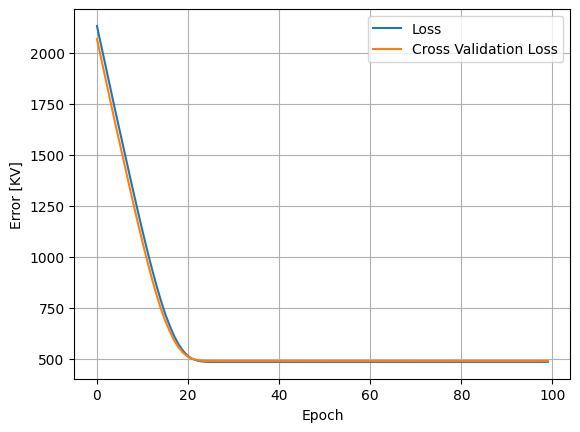

In [10]:
# Identify Strings for graphing
errorStr1 = 'KV'

# Plot Loss Function for model
plotLoss(history1,errorStr1)

101/101 [==============================] - 0s 1ms/step


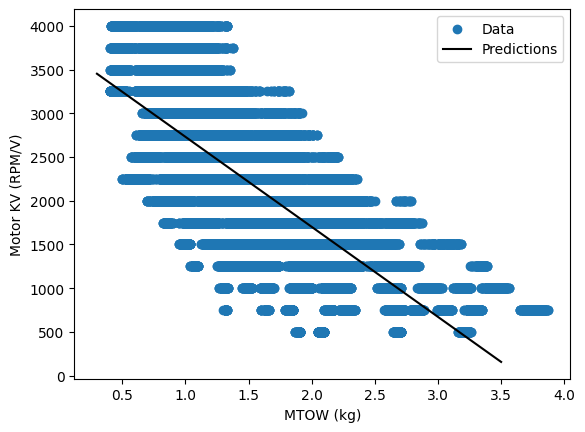

In [11]:
# Identify Prediction Values and Output Values
x1 = tf.linspace(0.3,3.5,3201)
y1 = MTOWKVModel.predict(x1)

# Generate plot strings for regression
trainF1 = trainFeaturesKV['MTOW']
trainL1 = trainKV

inputVarStr = 'MTOW (kg)'
outputVarStr = 'Motor KV (RPM/V)'

# Plot values
plotRegression(x1,y1,trainF1,trainL1,inputVarStr,outputVarStr)

# Save test results
testResults = {}
testResults['MTOWKVModel'] = MTOWKVModel.evaluate(
    testFeaturesKV['MTOW'],testKV,
    verbose=0)

**Model 2 - Motor Diameter - MTOW**

In [ ]:
# Load data for the model
trainFeaturesmotDiam = train_data.copy()
testFeaturesmotDiam = test_data.copy()

# Identify the prediction variable
trainmotDiam = trainFeaturesmotDiam.pop('motDiam')
testmotDiam = testFeaturesmotDiam.pop('motDiam')

# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesmotDiam))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesmotDiam[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# Normalise the input variable
MTOW = np.array(trainFeaturesmotDiam['MTOW'])
MTOW_normaliser = layers.Normalization(input_shape=[1,], axis=None)
MTOW_normaliser.adapt(MTOW)

# Run the model
MTOWmotDiamModel = LinearModel(MTOW_normaliser)

# Show model summary
MTOWmotDiamModel.summary()

# Run fitting for the model
history2 = MTOWmotDiamModel.fit(
    trainFeaturesmotDiam['MTOW'],
    trainmotDiam,
    validation_split=0.2,
    verbose=0, epochs=100)

[[2.1800151e+03 9.9999994e-02 9.9999981e+00 9.9999981e+00 4.9999969e+01
  6.1612186e+00 4.8289785e+00 2.0000000e+00 2.1154501e+01 4.0000000e+00
  1.9694589e+03 2.1068083e+01 9.3546171e+00 5.0584249e+00 1.8572098e+01
  1.5284309e+00 1.5969214e-01 1.7242265e-01 1.6327421e-01 1.0448481e-01
  1.0274209e-01 7.5852513e-02 7.0648871e-02 7.2391465e-02 7.8490630e-02
  4.9279958e-01 3.5147727e-01 1.5572263e-01]]
First example: [[2500.      0.1    10.     10.     50.      4.      4.      2.     20.
     4.   1000.     10.      5.79    3.85   13.4     0.58    0.      1.
     0.      0.      0.      0.      0.      0.      0.      1.      0.
     0.  ]]

Normalized: [[ 0.35  0.07  0.2   0.2   0.69 -0.85 -0.58  0.   -0.12  0.   -0.91 -1.14
  -0.73 -0.57 -0.74 -1.39 -0.44  2.19 -0.44 -0.34 -0.34 -0.29 -0.28 -0.28
  -0.29  1.01 -0.74 -0.43]]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normali

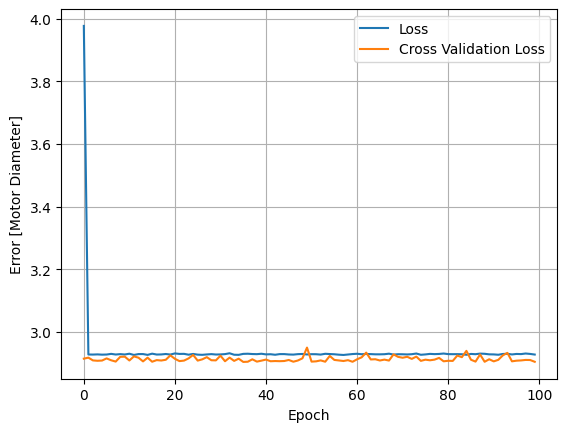

In [ ]:
# Identify Strings for graphing
errorStr2 = 'Motor Diameter'

# Plot Loss Function for model
plotLoss(history2,errorStr2)

101/101 [==============================] - 0s 2ms/step


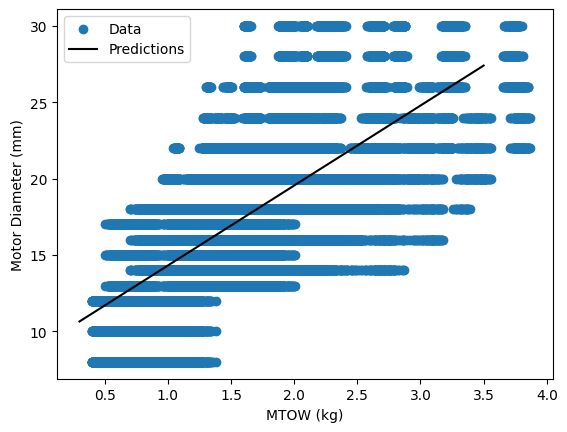

In [ ]:
# Identify Prediction Values and Output Values
x2 = tf.linspace(0.3,3.5,3201)
y2 = MTOWmotDiamModel.predict(x2)

# Generate plot strings for regression
trainF2 = trainFeaturesmotDiam['MTOW']
trainL2 = trainmotDiam

inputVarStr = 'MTOW (kg)'
outputVarStr = 'Motor Diameter (mm)'

# Plot values
plotRegression(x2,y2,trainF2,trainL2,inputVarStr,outputVarStr)

# Save test results
testResults['MTOWmotDiamModel'] = MTOWmotDiamModel.evaluate(
    testFeaturesmotDiam['MTOW'],testmotDiam,
    verbose=0)

**Model 3 - Propeller Diameter - MTOW**

In [ ]:
# Load data for the model
trainFeaturesPropDiam = train_data.copy()
testFeaturesPropDiam = test_data.copy()

# Identify the prediction variable
trainPropDiam = trainFeaturesPropDiam.pop('propDiam')
testPropDiam = testFeaturesPropDiam.pop('propDiam')

# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesPropDiam))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesPropDiam[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# Normalise the input variable
MTOW = np.array(trainFeaturesPropDiam['MTOW'])
MTOW_normaliser = layers.Normalization(input_shape=[1,], axis=None)
MTOW_normaliser.adapt(MTOW)

# Run the model
MTOWPropDiamModel = LinearModel(MTOW_normaliser)

# Show model summary
MTOWPropDiamModel.summary()

# Run fitting for the model
history3 = MTOWPropDiamModel.fit(
    trainFeaturesPropDiam['MTOW'],
    trainPropDiam,
    validation_split=0.2,
    verbose=0, epochs=100)

[[2.1800151e+03 9.9999994e-02 9.9999981e+00 9.9999981e+00 4.9999969e+01
  1.7313648e+01 4.8289785e+00 2.0000000e+00 2.1154501e+01 4.0000000e+00
  1.9694589e+03 2.1068083e+01 9.3546171e+00 5.0584249e+00 1.8572098e+01
  1.5284309e+00 1.5969214e-01 1.7242265e-01 1.6327421e-01 1.0448481e-01
  1.0274209e-01 7.5852513e-02 7.0648871e-02 7.2391465e-02 7.8490630e-02
  4.9279958e-01 3.5147727e-01 1.5572263e-01]]
First example: [[2500.      0.1    10.     10.     50.     15.      4.      2.     20.
     4.   1000.     10.      5.79    3.85   13.4     0.58    0.      1.
     0.      0.      0.      0.      0.      0.      0.      1.      0.
     0.  ]]

Normalized: [[ 0.35  0.07  0.2   0.2   0.69 -0.44 -0.58  0.   -0.12  0.   -0.91 -1.14
  -0.73 -0.57 -0.74 -1.39 -0.44  2.19 -0.44 -0.34 -0.34 -0.29 -0.28 -0.28
  -0.29  1.01 -0.74 -0.43]]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normali

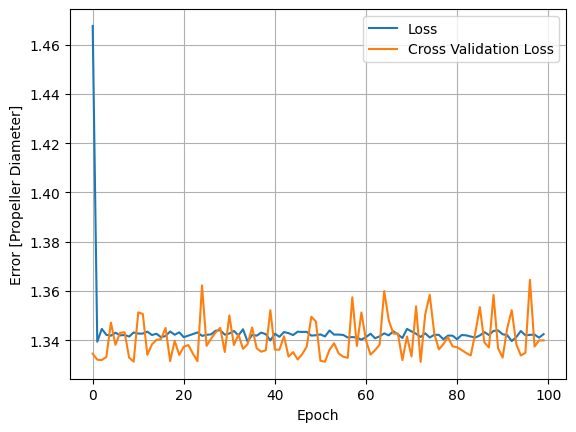

In [ ]:
# Identify Strings for graphing
errorStr3 = 'Propeller Diameter'

# Plot Loss Function for model
plotLoss(history3,errorStr3)

101/101 [==============================] - 0s 1ms/step


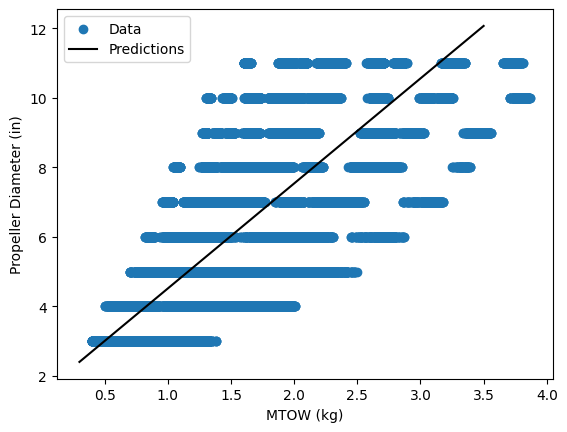

In [ ]:
# Identify Prediction Values and Output Values
x3 = tf.linspace(0.3,3.5,3201)
y3 = MTOWPropDiamModel.predict(x3)

# Generate plot strings for regression
trainF3 = trainFeaturesPropDiam['MTOW']
trainL3 = trainPropDiam

inputVarStr3 = 'MTOW (kg)'
outputVarStr3 = 'Propeller Diameter (in)'

# Plot values
plotRegression(x3,y3,trainF3,trainL3,inputVarStr3,outputVarStr3)

# Save test results
testResults['MTOWPropDiamModel'] = MTOWPropDiamModel.evaluate(
    testFeaturesPropDiam['MTOW'],testPropDiam,
    verbose=0)

**Model 4 - ESC Current - MTOW**

In [ ]:
# Load data for the model
trainFeaturesESCCurrent = train_data.copy()
testFeaturesESCCurrent = test_data.copy()

# Identify the prediction variable
trainESCCurrent = trainFeaturesESCCurrent.pop('ESCCurrent')
testESCCurrent = testFeaturesESCCurrent.pop('ESCCurrent')

# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesESCCurrent))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesESCCurrent[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# Normalise the input variable
MTOW = np.array(trainFeaturesESCCurrent['MTOW'])
MTOW_normaliser = layers.Normalization(input_shape=[1,], axis=None)
MTOW_normaliser.adapt(MTOW)

# Run the model
MTOWESCCurrentModel = LinearModel(MTOW_normaliser)

# Show model summary
MTOWESCCurrentModel.summary()

# Run fitting for the model
history4 = MTOWESCCurrentModel.fit(
    trainFeaturesESCCurrent['MTOW'],
    trainESCCurrent,
    validation_split=0.2,
    verbose=0, epochs=100)

[[2.1800151e+03 9.9999994e-02 9.9999981e+00 9.9999981e+00 4.9999969e+01
  1.7313648e+01 6.1612186e+00 4.8289785e+00 2.0000000e+00 4.0000000e+00
  1.9694589e+03 2.1068083e+01 9.3546171e+00 5.0584249e+00 1.8572098e+01
  1.5284309e+00 1.5969214e-01 1.7242265e-01 1.6327421e-01 1.0448481e-01
  1.0274209e-01 7.5852513e-02 7.0648871e-02 7.2391465e-02 7.8490630e-02
  4.9279958e-01 3.5147727e-01 1.5572263e-01]]
First example: [[2500.      0.1    10.     10.     50.     15.      4.      4.      2.
     4.   1000.     10.      5.79    3.85   13.4     0.58    0.      1.
     0.      0.      0.      0.      0.      0.      0.      1.      0.
     0.  ]]

Normalized: [[ 0.35  0.07  0.2   0.2   0.69 -0.44 -0.85 -0.58  0.    0.   -0.91 -1.14
  -0.73 -0.57 -0.74 -1.39 -0.44  2.19 -0.44 -0.34 -0.34 -0.29 -0.28 -0.28
  -0.29  1.01 -0.74 -0.43]]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normali

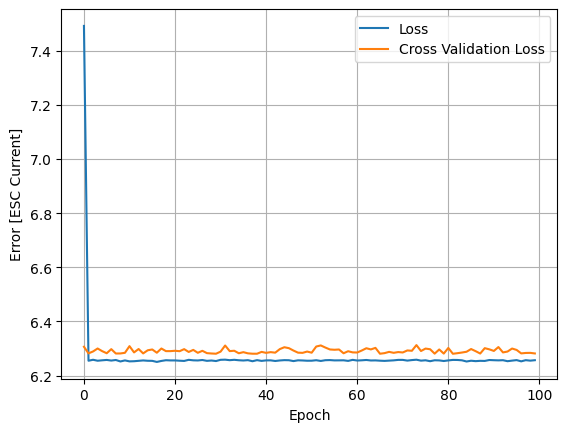

In [ ]:
# Identify Strings for graphing
errorStr4 = 'ESC Current'

# Plot Loss Function for model
plotLoss(history4,errorStr4)

101/101 [==============================] - 0s 1ms/step


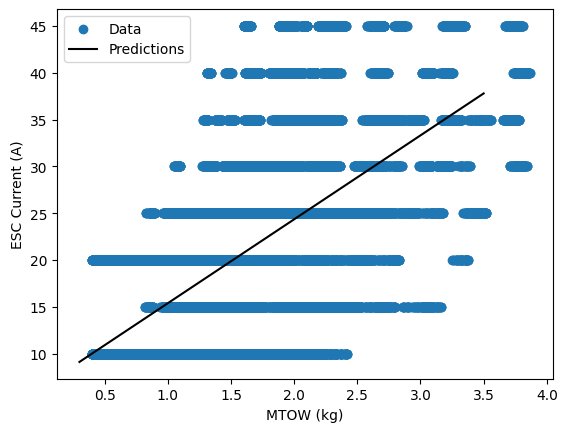

In [ ]:
# Identify Prediction Values and Output Values
x4 = tf.linspace(0.3,3.5,3201)
y4 = MTOWESCCurrentModel.predict(x4)

# Generate plot strings for regression
trainF4 = trainFeaturesESCCurrent['MTOW']
trainL4 = trainESCCurrent

inputVarStr4 = 'MTOW (kg)'
outputVarStr4 = 'ESC Current (A)'

# Plot values
plotRegression(x4,y4,trainF4,trainL4,inputVarStr4,outputVarStr4)

# Save test results
testResults['MTOWESCCurrentModel'] = MTOWESCCurrentModel.evaluate(
    testFeaturesESCCurrent['MTOW'],testESCCurrent,
    verbose=0)

**Model 5 - Battery Capacity - MTOW**

In [ ]:
trainFeaturesBattCap = train_data.copy()
testFeaturesBattCap = test_data.copy()

# Identify the prediction variable
trainBattCap = trainFeaturesBattCap.pop('BattCap')
testBattCap = testFeaturesBattCap.pop('BattCap')

# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesBattCap))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesBattCap[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# Normalise the input variable
MTOW = np.array(trainFeaturesBattCap['MTOW'])
MTOW_normaliser = layers.Normalization(input_shape=[1,], axis=None)
MTOW_normaliser.adapt(MTOW)

# Run the model
MTOWBattCapModel = LinearModel(MTOW_normaliser)

# Show model summary
MTOWBattCapModel.summary()

# Run fitting for the model
history5 = MTOWBattCapModel.fit(
    trainFeaturesBattCap['MTOW'],
    trainBattCap,
    validation_split=0.2,
    verbose=0, epochs=100)

[[2.1800151e+03 9.9999994e-02 9.9999981e+00 9.9999981e+00 4.9999969e+01
  1.7313648e+01 6.1612186e+00 4.8289785e+00 2.0000000e+00 2.1154501e+01
  4.0000000e+00 2.1068083e+01 9.3546171e+00 5.0584249e+00 1.8572098e+01
  1.5284309e+00 1.5969214e-01 1.7242265e-01 1.6327421e-01 1.0448481e-01
  1.0274209e-01 7.5852513e-02 7.0648871e-02 7.2391465e-02 7.8490630e-02
  4.9279958e-01 3.5147727e-01 1.5572263e-01]]
First example: [[2500.      0.1    10.     10.     50.     15.      4.      4.      2.
    20.      4.     10.      5.79    3.85   13.4     0.58    0.      1.
     0.      0.      0.      0.      0.      0.      0.      1.      0.
     0.  ]]

Normalized: [[ 0.35  0.07  0.2   0.2   0.69 -0.44 -0.85 -0.58  0.   -0.12  0.   -1.14
  -0.73 -0.57 -0.74 -1.39 -0.44  2.19 -0.44 -0.34 -0.34 -0.29 -0.28 -0.28
  -0.29  1.01 -0.74 -0.43]]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normali

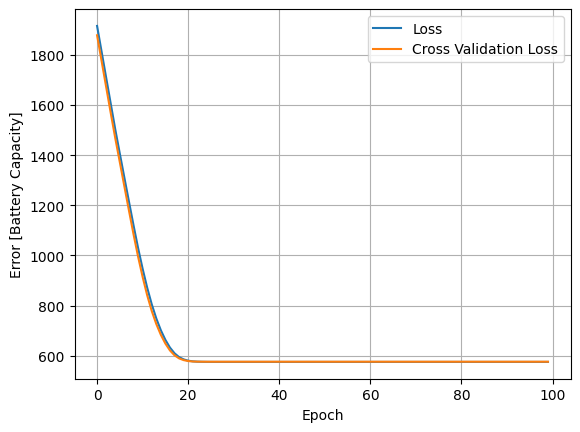

In [ ]:
# Identify Strings for graphing
errorStr5 = 'Battery Capacity'

# Plot Loss Function for model
plotLoss(history5,errorStr5)

101/101 [==============================] - 0s 1ms/step


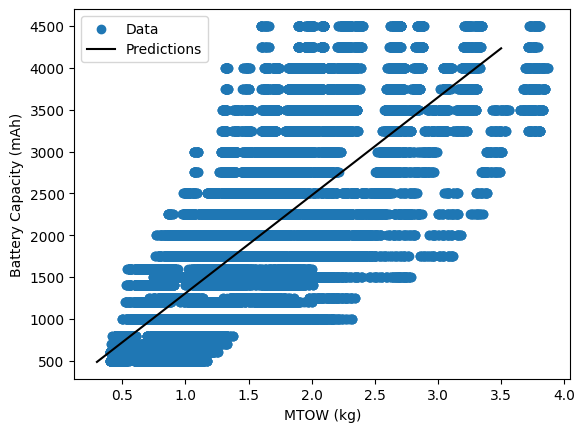

In [ ]:
# Identify Prediction Values and Output Values
x5 = tf.linspace(0.3,3.5,3201)
y5 = MTOWBattCapModel.predict(x5)

# Generate plot strings for regression
trainF5 = trainFeaturesBattCap['MTOW']
trainL5 = trainBattCap

inputVarStr5 = 'MTOW (kg)'
outputVarStr5 = 'Battery Capacity (mAh)'

# Plot values
plotRegression(x5,y5,trainF5,trainL5,inputVarStr5,outputVarStr5)

# Save test results
testResults['MTOWBattCapModel'] = MTOWBattCapModel.evaluate(
    testFeaturesBattCap['MTOW'],testBattCap,
    verbose=0)

**Model 6 - KV - Endurance**

In [ ]:
# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesKV))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesKV[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# Normalise the input variable
Endurance = np.array(trainFeaturesKV['Endurance'])
Endurance_normaliser = layers.Normalization(input_shape=[1,], axis=None)
Endurance_normaliser.adapt(Endurance)

# Run the model
EnduranceKVModel = LinearModel(Endurance_normaliser)

# Show model summary
EnduranceKVModel.summary()

# Run fitting for the model
history6 = EnduranceKVModel.fit(
    trainFeaturesKV['Endurance'],
    trainKV,
    validation_split=0.2,
    verbose=0, epochs=100)

[[9.9999994e-02 9.9999981e+00 9.9999981e+00 4.9999969e+01 1.7313648e+01
  6.1612186e+00 4.8289785e+00 2.0000000e+00 2.1154501e+01 4.0000000e+00
  1.9694589e+03 2.1068083e+01 9.3546171e+00 5.0584249e+00 1.8572098e+01
  1.5284309e+00 1.5969214e-01 1.7242265e-01 1.6327421e-01 1.0448481e-01
  1.0274209e-01 7.5852513e-02 7.0648871e-02 7.2391465e-02 7.8490630e-02
  4.9279958e-01 3.5147727e-01 1.5572263e-01]]
First example: [[   0.1    10.     10.     50.     15.      4.      4.      2.     20.
     4.   1000.     10.      5.79    3.85   13.4     0.58    0.      1.
     0.      0.      0.      0.      0.      0.      0.      1.      0.
     0.  ]]

Normalized: [[ 0.07  0.2   0.2   0.69 -0.44 -0.85 -0.58  0.   -0.12  0.   -0.91 -1.14
  -0.73 -0.57 -0.74 -1.39 -0.44  2.19 -0.44 -0.34 -0.34 -0.29 -0.28 -0.28
  -0.29  1.01 -0.74 -0.43]]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normali

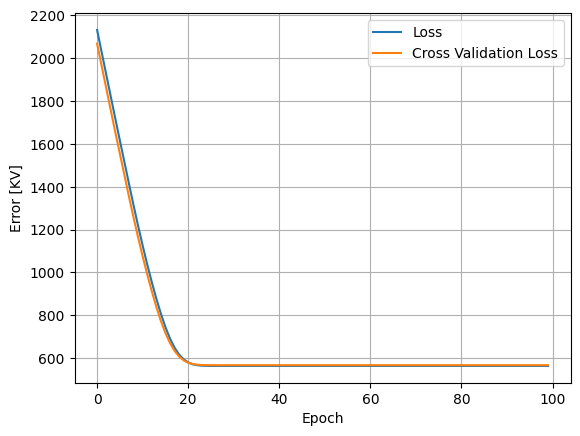

In [ ]:
# Identify Strings for graphing
errorStr6 = 'KV'

# Plot Loss Function for model
plotLoss(history6,errorStr6)

74/74 [==============================] - 0s 1ms/step


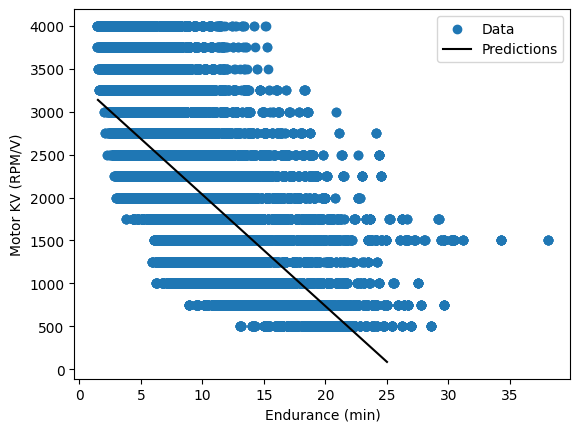

In [ ]:
# Identify Prediction Values and Output Values
x6 = tf.linspace(1.5, 25, 2351)
y6 = EnduranceKVModel.predict(x6)

# Generate plot strings for regression
trainF6 = trainFeaturesKV['Endurance']
trainL6 = trainKV

inputVarStr6 = 'Endurance (min)'
outputVarStr6 = 'Motor KV (RPM/V)'

# Plot values
plotRegression(x6,y6,trainF6,trainL6,inputVarStr6,outputVarStr6)

# Save test results
testResults['EnduranceKVModel'] = EnduranceKVModel.evaluate(
    testFeaturesKV['Endurance'],testKV,
    verbose=0)

**Model 7 - Battery Capacity - Endurance**

In [ ]:
# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesBattCap))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesBattCap[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# Normalise the input variable
Endurance = np.array(trainFeaturesBattCap['Endurance'])
Endurance_normaliser = layers.Normalization(input_shape=[1,], axis=None)
Endurance_normaliser.adapt(Endurance)

# Run the model
EnduranceBattCapModel = LinearModel(Endurance_normaliser)

# Show model summary
EnduranceBattCapModel.summary()

# Run fitting for the model
history7 = EnduranceBattCapModel.fit(
    trainFeaturesBattCap['Endurance'],
    trainBattCap,
    validation_split=0.2,
    verbose=0, epochs=100)

[[2.1800151e+03 9.9999994e-02 9.9999981e+00 9.9999981e+00 4.9999969e+01
  1.7313648e+01 6.1612186e+00 4.8289785e+00 2.0000000e+00 2.1154501e+01
  4.0000000e+00 2.1068083e+01 9.3546171e+00 5.0584249e+00 1.8572098e+01
  1.5284309e+00 1.5969214e-01 1.7242265e-01 1.6327421e-01 1.0448481e-01
  1.0274209e-01 7.5852513e-02 7.0648871e-02 7.2391465e-02 7.8490630e-02
  4.9279958e-01 3.5147727e-01 1.5572263e-01]]
First example: [[2500.      0.1    10.     10.     50.     15.      4.      4.      2.
    20.      4.     10.      5.79    3.85   13.4     0.58    0.      1.
     0.      0.      0.      0.      0.      0.      0.      1.      0.
     0.  ]]

Normalized: [[ 0.35  0.07  0.2   0.2   0.69 -0.44 -0.85 -0.58  0.   -0.12  0.   -1.14
  -0.73 -0.57 -0.74 -1.39 -0.44  2.19 -0.44 -0.34 -0.34 -0.29 -0.28 -0.28
  -0.29  1.01 -0.74 -0.43]]
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normali

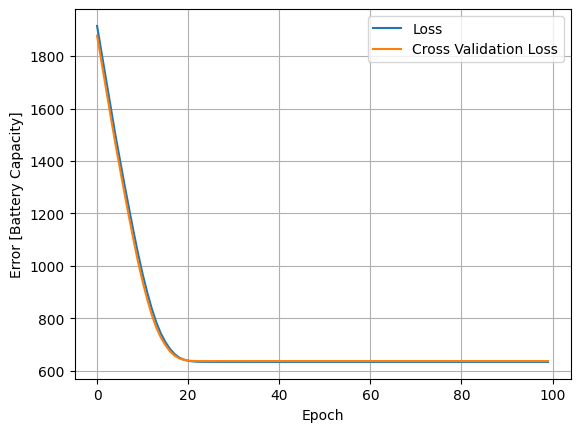

In [ ]:
# Identify Strings for graphing
errorStr7 = 'Battery Capacity'

# Plot Loss Function for model
plotLoss(history7,errorStr7)

74/74 [==============================] - 0s 2ms/step


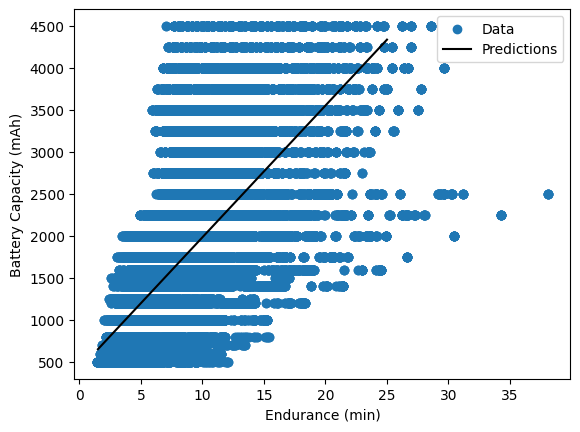

In [ ]:
# Identify Prediction Values and Output Values
x7 = tf.linspace(1.5, 25, 2351)
y7 = EnduranceBattCapModel.predict(x7)

# Generate plot strings for regression
trainF7 = trainFeaturesBattCap['Endurance']
trainL7 = trainBattCap

inputVarStr7 = 'Endurance (min)'
outputVarStr7 = 'Battery Capacity (mAh)'

# Plot values
plotRegression(x7,y7,trainF7,trainL7,inputVarStr7,outputVarStr7)

# Save test results
testResults['dnnEnduranceBattCapModel'] = EnduranceBattCapModel.evaluate(
    testFeaturesBattCap['Endurance'],testBattCap,
    verbose=0)

**Model 8 - Battery Capacity - Range**

In [ ]:
# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesBattCap))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesBattCap[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# Normalise the input variable
Range = np.array(trainFeaturesBattCap['Range'])
Range_normaliser = layers.Normalization(input_shape=[1,], axis=None)
Range_normaliser.adapt(Range)

# Run the model
RangeBattCapModel = LinearModel(Range_normaliser)

# Show model summary
RangeBattCapModel.summary()

# Run fitting for the model
history8 = RangeBattCapModel.fit(
    trainFeaturesBattCap['Range'],
    trainBattCap,
    validation_split=0.2,
    verbose=0, epochs=100)

[[2.1800151e+03 9.9999994e-02 9.9999981e+00 9.9999981e+00 4.9999969e+01
  1.7313648e+01 6.1612186e+00 4.8289785e+00 2.0000000e+00 2.1154501e+01
  4.0000000e+00 2.1068083e+01 9.3546171e+00 5.0584249e+00 1.8572098e+01
  1.5284309e+00 1.5969214e-01 1.7242265e-01 1.6327421e-01 1.0448481e-01
  1.0274209e-01 7.5852513e-02 7.0648871e-02 7.2391465e-02 7.8490630e-02
  4.9279958e-01 3.5147727e-01 1.5572263e-01]]
First example: [[2500.      0.1    10.     10.     50.     15.      4.      4.      2.
    20.      4.     10.      5.79    3.85   13.4     0.58    0.      1.
     0.      0.      0.      0.      0.      0.      0.      1.      0.
     0.  ]]

Normalized: [[ 0.35  0.07  0.2   0.2   0.69 -0.44 -0.85 -0.58  0.   -0.12  0.   -1.14
  -0.73 -0.57 -0.74 -1.39 -0.44  2.19 -0.44 -0.34 -0.34 -0.29 -0.28 -0.28
  -0.29  1.01 -0.74 -0.43]]
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normali

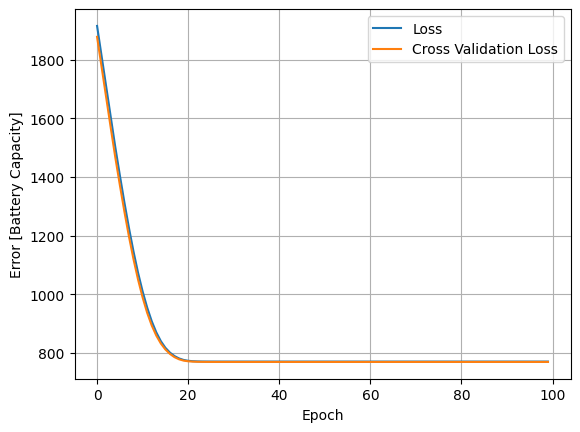

In [ ]:
# Identify Strings for graphing
errorStr8 = 'Battery Capacity'

# Plot Loss Function for model
plotLoss(history8,errorStr8)

51/51 [==============================] - 0s 2ms/step


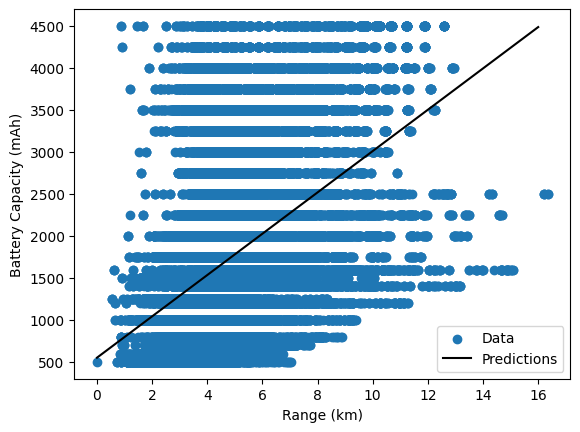

In [ ]:
# Identify Prediction Values and Output Values
x8 = tf.linspace(0, 16, 1601)
y8 = RangeBattCapModel.predict(x8)

# Generate plot strings for regression
trainF8 = trainFeaturesBattCap['Range']
trainL8 = trainBattCap

inputVarStr8 = 'Range (km)'
outputVarStr8 = 'Battery Capacity (mAh)'

# Plot values
plotRegression(x8,y8,trainF8,trainL8,inputVarStr8,outputVarStr8)

# Save test results
testResults['RangeBattCapModel'] = RangeBattCapModel.evaluate(
    testFeaturesBattCap['Range'],testBattCap,
    verbose=0)

**Model 9 - KV - Maximum Speed**

In [12]:
# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesKV))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesKV[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# Normalise the input variable
MaxSpeed = np.array(trainFeaturesKV['MaxSpeed'])
MaxSpeed_normaliser = layers.Normalization(input_shape=[1,], axis=None)
MaxSpeed_normaliser.adapt(MaxSpeed)

# Run the model
MaxSpeedKVModel = LinearModel(MaxSpeed_normaliser)

# Show model summary
MaxSpeedKVModel.summary()

# Run fitting for the model
history9 = MaxSpeedKVModel.fit(
    trainFeaturesKV['MaxSpeed'],
    trainKV,
    validation_split=0.2,
    verbose=0, epochs=100)

[[9.9999994e-02 9.9999981e+00 9.9999981e+00 4.9999969e+01 1.7313648e+01
  6.1612186e+00 4.8289785e+00 2.0000000e+00 2.1154501e+01 4.0000000e+00
  1.9694589e+03 2.1068083e+01 9.3546171e+00 5.0584249e+00 1.8572098e+01
  1.5284309e+00 1.5969214e-01 1.7242265e-01 1.6327421e-01 1.0448481e-01
  1.0274209e-01 7.5852513e-02 7.0648871e-02 7.2391465e-02 7.8490630e-02
  4.9279958e-01 3.5147727e-01 1.5572263e-01]]
First example: [[   0.1    10.     10.     50.     15.      4.      4.      2.     20.
     4.   1000.     10.      5.79    3.85   13.4     0.58    0.      1.
     0.      0.      0.      0.      0.      0.      0.      1.      0.
     0.  ]]

Normalized: [[ 0.07  0.2   0.2   0.69 -0.44 -0.85 -0.58  0.   -0.12  0.   -0.91 -1.14
  -0.73 -0.57 -0.74 -1.39 -0.44  2.19 -0.44 -0.34 -0.34 -0.29 -0.28 -0.28
  -0.29  1.01 -0.74 -0.43]]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normali

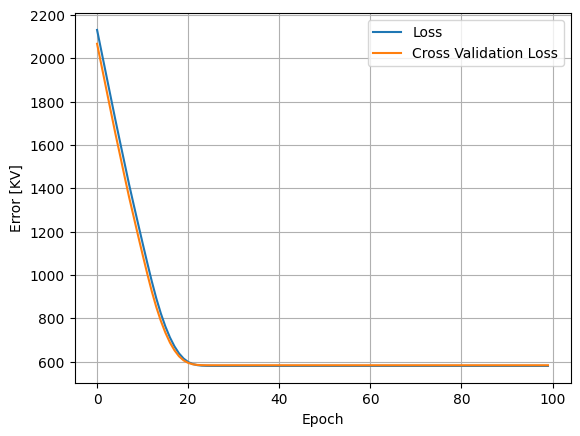

In [ ]:
# Identify Strings for graphing
errorStr9 = 'KV'

# Plot Loss Function for model
plotLoss(history9,errorStr9)

110/110 [==============================] - 0s 2ms/step


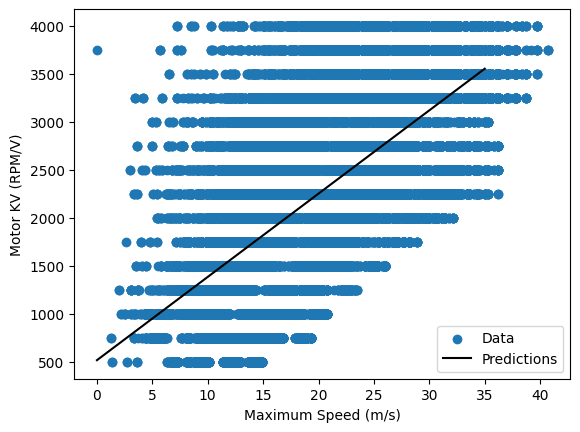

In [13]:
# Identify Prediction Values and Output Values
x9 = tf.linspace(0, 35, 3501)
y9 = MaxSpeedKVModel.predict(x9)

# Generate plot strings for regression
trainF9 = trainFeaturesKV['MaxSpeed']
trainL9 = trainKV

inputVarStr9 = 'Maximum Speed (m/s)'
outputVarStr9 = 'Motor KV (RPM/V)'

# Plot values
plotRegression(x9,y9,trainF9,trainL9,inputVarStr9,outputVarStr9)

# Save test results
testResults['MaxSpeedKVModel'] = MaxSpeedKVModel.evaluate(
    testFeaturesKV['MaxSpeed'],testKV,
    verbose=0)

**Model 10 - Propeller Pitch - Maximum Speed**

In [ ]:
# Load data for the model
trainFeaturesPropPitch = train_data.copy()
testFeaturesPropPitch = test_data.copy()

# Identify the prediction variable
trainPropPitch = trainFeaturesPropPitch.pop('propPitch')
testPropPitch = testFeaturesPropPitch.pop('propPitch')

# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesPropPitch))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesPropPitch[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# Normalise the input variable
MaxSpeed = np.array(trainFeaturesPropPitch['MaxSpeed'])
MaxSpeed_normaliser = layers.Normalization(input_shape=[1,], axis=None)
MaxSpeed_normaliser.adapt(MaxSpeed)

# Run the model
MaxSpeedPropPitchModel = LinearModel(MaxSpeed_normaliser)

# Show model summary
MaxSpeedPropPitchModel.summary()

# Run fitting for the model
history10 = MaxSpeedPropPitchModel.fit(
    trainFeaturesPropPitch['MaxSpeed'],
    trainPropPitch,
    validation_split=0.2,
    verbose=0, epochs=100)

[[2.1800151e+03 9.9999994e-02 9.9999981e+00 9.9999981e+00 4.9999969e+01
  1.7313648e+01 6.1612186e+00 2.0000000e+00 2.1154501e+01 4.0000000e+00
  1.9694589e+03 2.1068083e+01 9.3546171e+00 5.0584249e+00 1.8572098e+01
  1.5284309e+00 1.5969214e-01 1.7242265e-01 1.6327421e-01 1.0448481e-01
  1.0274209e-01 7.5852513e-02 7.0648871e-02 7.2391465e-02 7.8490630e-02
  4.9279958e-01 3.5147727e-01 1.5572263e-01]]
First example: [[2500.      0.1    10.     10.     50.     15.      4.      2.     20.
     4.   1000.     10.      5.79    3.85   13.4     0.58    0.      1.
     0.      0.      0.      0.      0.      0.      0.      1.      0.
     0.  ]]

Normalized: [[ 0.35  0.07  0.2   0.2   0.69 -0.44 -0.85  0.   -0.12  0.   -0.91 -1.14
  -0.73 -0.57 -0.74 -1.39 -0.44  2.19 -0.44 -0.34 -0.34 -0.29 -0.28 -0.28
  -0.29  1.01 -0.74 -0.43]]
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normali

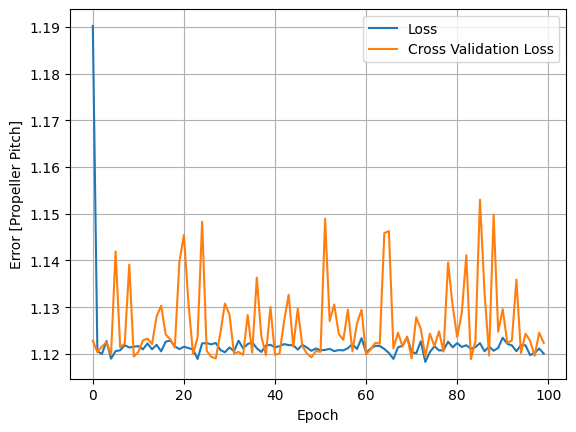

In [ ]:
# Identify Strings for graphing
errorStr10 = 'Propeller Pitch'

# Plot Loss Function for model
plotLoss(history10,errorStr10)

110/110 [==============================] - 0s 1ms/step


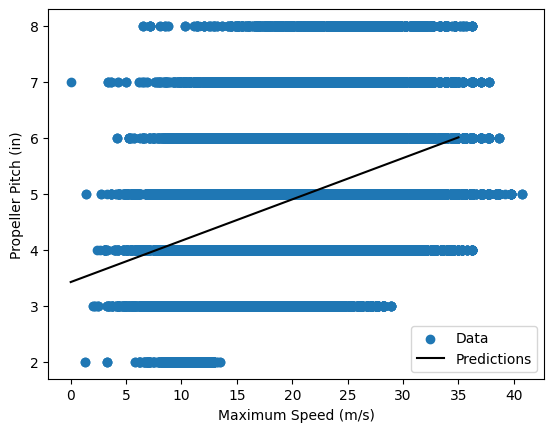

In [ ]:
# Identify Prediction Values and Output Values
x10 = tf.linspace(0, 35, 3501)
y10 = MaxSpeedPropPitchModel.predict(x10)

# Generate plot strings for regression
trainF10 = trainFeaturesPropPitch['MaxSpeed']
trainL10 = trainPropPitch

inputVarStr10 = 'Maximum Speed (m/s)'
outputVarStr10 = 'Propeller Pitch (in)'

# Plot values
plotRegression(x10,y10,trainF10,trainL10,inputVarStr10,outputVarStr10)

# Save test results
testResults['MaxSpeedPropPitchModel'] = MaxSpeedPropPitchModel.evaluate(
    testFeaturesPropPitch['MaxSpeed'],testPropPitch,
    verbose=0)

**Model 11 - ESC Current - Maximum Speed**

In [ ]:
# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesESCCurrent))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesESCCurrent[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# Normalise the input variable
MaxSpeed = np.array(trainFeaturesESCCurrent['MaxSpeed'])
MaxSpeed_normaliser = layers.Normalization(input_shape=[1,], axis=None)
MaxSpeed_normaliser.adapt(MaxSpeed)

# Run the model
MaxSpeedESCCurrentModel = LinearModel(MaxSpeed_normaliser)

# Show model summary
MaxSpeedESCCurrentModel.summary()

# Run fitting for the model
history11 = MaxSpeedESCCurrentModel.fit(
    trainFeaturesESCCurrent['MaxSpeed'],
    trainESCCurrent,
    validation_split=0.2,
    verbose=0, epochs=100)

[[2.1800151e+03 9.9999994e-02 9.9999981e+00 9.9999981e+00 4.9999969e+01
  1.7313648e+01 6.1612186e+00 4.8289785e+00 2.0000000e+00 4.0000000e+00
  1.9694589e+03 2.1068083e+01 9.3546171e+00 5.0584249e+00 1.8572098e+01
  1.5284309e+00 1.5969214e-01 1.7242265e-01 1.6327421e-01 1.0448481e-01
  1.0274209e-01 7.5852513e-02 7.0648871e-02 7.2391465e-02 7.8490630e-02
  4.9279958e-01 3.5147727e-01 1.5572263e-01]]
First example: [[2500.      0.1    10.     10.     50.     15.      4.      4.      2.
     4.   1000.     10.      5.79    3.85   13.4     0.58    0.      1.
     0.      0.      0.      0.      0.      0.      0.      1.      0.
     0.  ]]

Normalized: [[ 0.35  0.07  0.2   0.2   0.69 -0.44 -0.85 -0.58  0.    0.   -0.91 -1.14
  -0.73 -0.57 -0.74 -1.39 -0.44  2.19 -0.44 -0.34 -0.34 -0.29 -0.28 -0.28
  -0.29  1.01 -0.74 -0.43]]
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normal

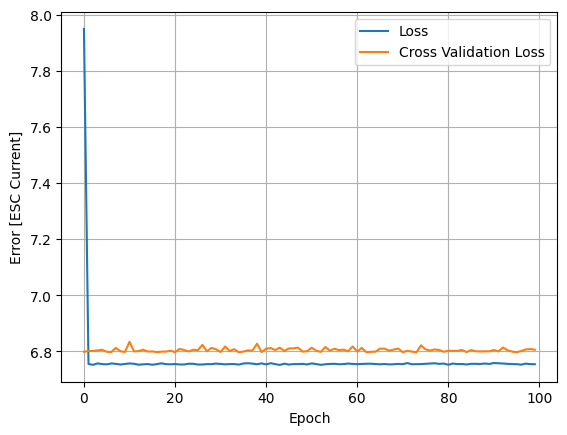

In [ ]:
# Identify Strings for graphing
errorStr11 = 'ESC Current'

# Plot Loss Function for model
plotLoss(history11,errorStr11)

110/110 [==============================] - 0s 1ms/step


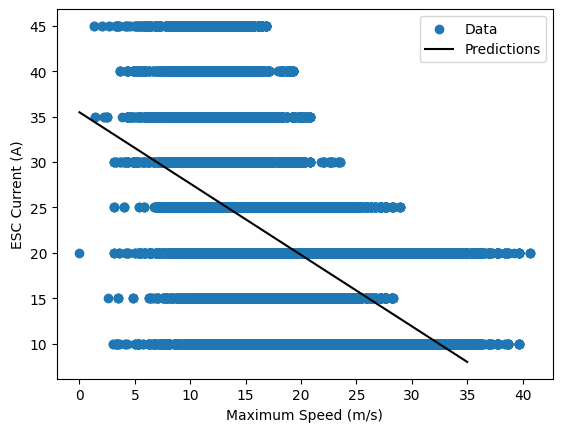

In [ ]:
# Identify Prediction Values and Output Values
x11 = tf.linspace(0, 35, 3501)
y11 = MaxSpeedESCCurrentModel.predict(x11)

# Generate plot strings for regression
trainF11 = trainFeaturesESCCurrent['MaxSpeed']
trainL11 = trainESCCurrent

inputVarStr11 = 'Maximum Speed (m/s)'
outputVarStr11 = 'ESC Current (A)'

# Plot values
plotRegression(x11,y11,trainF11,trainL11,inputVarStr11,outputVarStr11)

# Save test results
testResults['MaxSpeedESCCurrentModel'] = MaxSpeedESCCurrentModel.evaluate(
    testFeaturesESCCurrent['MaxSpeed'],testESCCurrent,
    verbose=0)

**Model 12 - Battery Capacity - Maximum Speed**

In [ ]:
# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesBattCap))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesBattCap[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# Normalise the input variable
MaxSpeed = np.array(trainFeaturesBattCap['MaxSpeed'])
MaxSpeed_normaliser = layers.Normalization(input_shape=[1,], axis=None)
MaxSpeed_normaliser.adapt(MaxSpeed)

# Run the model
MaxSpeedBattCapModel = LinearModel(MaxSpeed_normaliser)

# Show model summary
MaxSpeedBattCapModel.summary()

# Run fitting for the model
history12 = MaxSpeedBattCapModel.fit(
    trainFeaturesBattCap['MaxSpeed'],
    trainBattCap,
    validation_split=0.2,
    verbose=0, epochs=100)

[[2.1800151e+03 9.9999994e-02 9.9999981e+00 9.9999981e+00 4.9999969e+01
  1.7313648e+01 6.1612186e+00 4.8289785e+00 2.0000000e+00 2.1154501e+01
  4.0000000e+00 2.1068083e+01 9.3546171e+00 5.0584249e+00 1.8572098e+01
  1.5284309e+00 1.5969214e-01 1.7242265e-01 1.6327421e-01 1.0448481e-01
  1.0274209e-01 7.5852513e-02 7.0648871e-02 7.2391465e-02 7.8490630e-02
  4.9279958e-01 3.5147727e-01 1.5572263e-01]]
First example: [[2500.      0.1    10.     10.     50.     15.      4.      4.      2.
    20.      4.     10.      5.79    3.85   13.4     0.58    0.      1.
     0.      0.      0.      0.      0.      0.      0.      1.      0.
     0.  ]]

Normalized: [[ 0.35  0.07  0.2   0.2   0.69 -0.44 -0.85 -0.58  0.   -0.12  0.   -1.14
  -0.73 -0.57 -0.74 -1.39 -0.44  2.19 -0.44 -0.34 -0.34 -0.29 -0.28 -0.28
  -0.29  1.01 -0.74 -0.43]]
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normal

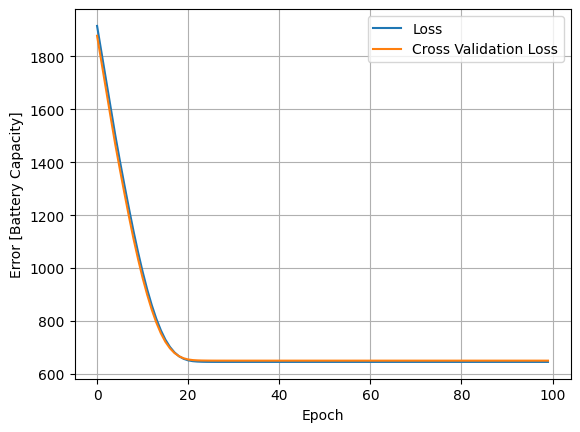

In [ ]:
# Identify Strings for graphing
errorStr12 = 'Battery Capacity'

# Plot Loss Function for model
plotLoss(history12,errorStr12)

110/110 [==============================] - 0s 1ms/step


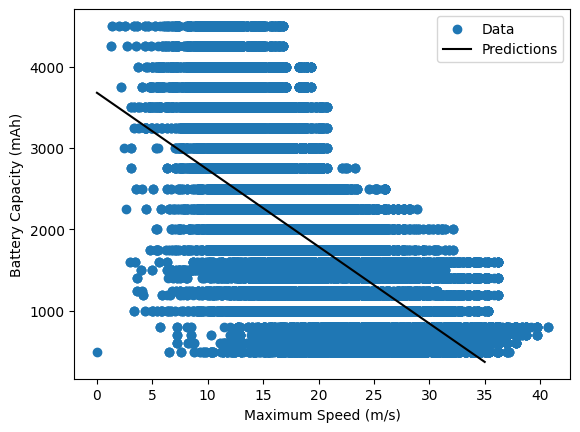

In [ ]:
# Identify Prediction Values and Output Values
x12 = tf.linspace(0, 35, 3501)
y12 = MaxSpeedBattCapModel.predict(x12)

# Generate plot strings for regression
trainF12 = trainFeaturesBattCap['MaxSpeed']
trainL12 = trainBattCap

inputVarStr12 = 'Maximum Speed (m/s)'
outputVarStr12 = 'Battery Capacity (mAh)'

# Plot values
plotRegression(x12,y12,trainF12,trainL12,inputVarStr12,outputVarStr12)

# Save test results
testResults['MaxSpeedBattCapModel'] = MaxSpeedBattCapModel.evaluate(
    testFeaturesBattCap['MaxSpeed'],testBattCap,
    verbose=0)

**Model 13 - Battery Discharge - Maximum Speed**

In [ ]:
# Load data for the model
trainFeaturesBattDischarge = train_data.copy()
testFeaturesBattDischarge = test_data.copy()

# Identify the prediction variable
trainBattDischarge = trainFeaturesBattDischarge.pop('BattDischarge')
testBattDischarge = testFeaturesBattDischarge.pop('BattDischarge')

# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesBattDischarge))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesBattDischarge[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# Normalise the input variable
MaxSpeed = np.array(trainFeaturesBattDischarge['MaxSpeed'])
MaxSpeed_normaliser = layers.Normalization(input_shape=[1,], axis=None)
MaxSpeed_normaliser.adapt(MaxSpeed)

# Run the model
MaxSpeedBattDischargeModel = LinearModel(MaxSpeed_normaliser)

# Show model summary
MaxSpeedBattDischargeModel.summary()

# Run fitting for the model
history13 = MaxSpeedBattDischargeModel.fit(
    trainFeaturesBattDischarge['MaxSpeed'],
    trainBattDischarge,
    validation_split=0.2,
    verbose=0, epochs=100)

[[2.1800151e+03 9.9999994e-02 9.9999981e+00 9.9999981e+00 4.9999969e+01
  1.7313648e+01 6.1612186e+00 4.8289785e+00 2.0000000e+00 2.1154501e+01
  4.0000000e+00 1.9694589e+03 9.3546171e+00 5.0584249e+00 1.8572098e+01
  1.5284309e+00 1.5969214e-01 1.7242265e-01 1.6327421e-01 1.0448481e-01
  1.0274209e-01 7.5852513e-02 7.0648871e-02 7.2391465e-02 7.8490630e-02
  4.9279958e-01 3.5147727e-01 1.5572263e-01]]
First example: [[2500.      0.1    10.     10.     50.     15.      4.      4.      2.
    20.      4.   1000.      5.79    3.85   13.4     0.58    0.      1.
     0.      0.      0.      0.      0.      0.      0.      1.      0.
     0.  ]]

Normalized: [[ 0.35  0.07  0.2   0.2   0.69 -0.44 -0.85 -0.58  0.   -0.12  0.   -0.91
  -0.73 -0.57 -0.74 -1.39 -0.44  2.19 -0.44 -0.34 -0.34 -0.29 -0.28 -0.28
  -0.29  1.01 -0.74 -0.43]]
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normal

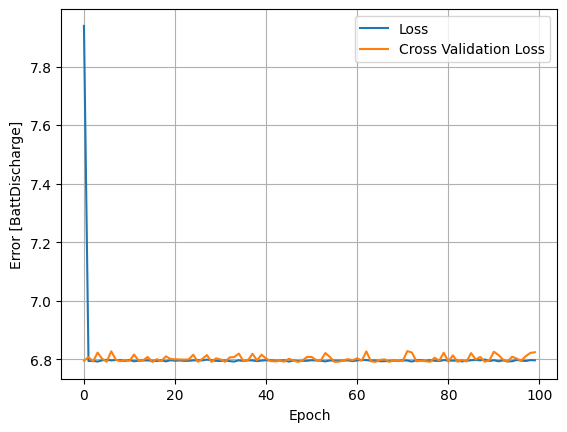

In [ ]:
# Identify Strings for graphing
errorStr13 = 'BattDischarge'

# Plot Loss Function for model
plotLoss(history13,errorStr13)

110/110 [==============================] - 0s 1ms/step


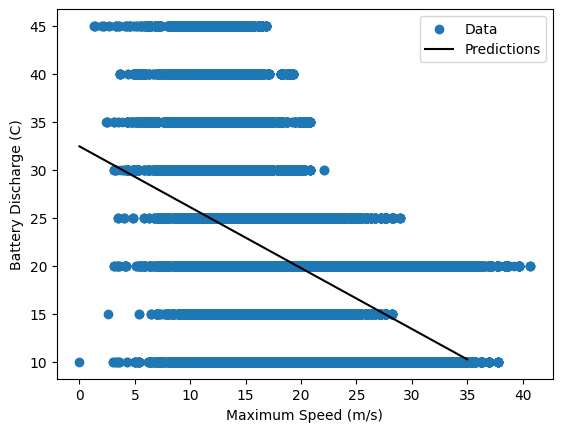

In [ ]:
# Identify Prediction Values and Output Values
x13 = tf.linspace(0, 35, 3501)
y13 = MaxSpeedBattDischargeModel.predict(x13)

# Generate plot strings for regression
trainF13 = trainFeaturesBattDischarge['MaxSpeed']
trainL13 = trainBattDischarge

inputVarStr13 = 'Maximum Speed (m/s)'
outputVarStr13 = 'Battery Discharge (C)'

# Plot values
plotRegression(x13,y13,trainF13,trainL13,inputVarStr13,outputVarStr13)

# Save test results
testResults['MaxSpeedBattDischargeModel'] = MaxSpeedBattDischargeModel.evaluate(
    testFeaturesBattDischarge['MaxSpeed'],testBattDischarge,
    verbose=0)

**Model 14 - Propeller Diameter - Maximum Speed**

In [ ]:
# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesPropDiam))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesPropDiam[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# Normalise the input variable
MaxSpeed = np.array(trainFeaturesPropDiam['MaxSpeed'])
MaxSpeed_normaliser = layers.Normalization(input_shape=[1,], axis=None)
MaxSpeed_normaliser.adapt(MaxSpeed)

# Run the model
MaxSpeedPropDiamModel = LinearModel(MaxSpeed_normaliser)

# Show model summary
MaxSpeedPropDiamModel.summary()

# Run fitting for the model
history14 = MaxSpeedPropDiamModel.fit(
    trainFeaturesPropDiam['MaxSpeed'],
    trainPropDiam,
    validation_split=0.2,
    verbose=0, epochs=100)

[[2.1800151e+03 9.9999994e-02 9.9999981e+00 9.9999981e+00 4.9999969e+01
  1.7313648e+01 4.8289785e+00 2.0000000e+00 2.1154501e+01 4.0000000e+00
  1.9694589e+03 2.1068083e+01 9.3546171e+00 5.0584249e+00 1.8572098e+01
  1.5284309e+00 1.5969214e-01 1.7242265e-01 1.6327421e-01 1.0448481e-01
  1.0274209e-01 7.5852513e-02 7.0648871e-02 7.2391465e-02 7.8490630e-02
  4.9279958e-01 3.5147727e-01 1.5572263e-01]]
First example: [[2500.      0.1    10.     10.     50.     15.      4.      2.     20.
     4.   1000.     10.      5.79    3.85   13.4     0.58    0.      1.
     0.      0.      0.      0.      0.      0.      0.      1.      0.
     0.  ]]

Normalized: [[ 0.35  0.07  0.2   0.2   0.69 -0.44 -0.58  0.   -0.12  0.   -0.91 -1.14
  -0.73 -0.57 -0.74 -1.39 -0.44  2.19 -0.44 -0.34 -0.34 -0.29 -0.28 -0.28
  -0.29  1.01 -0.74 -0.43]]
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normal

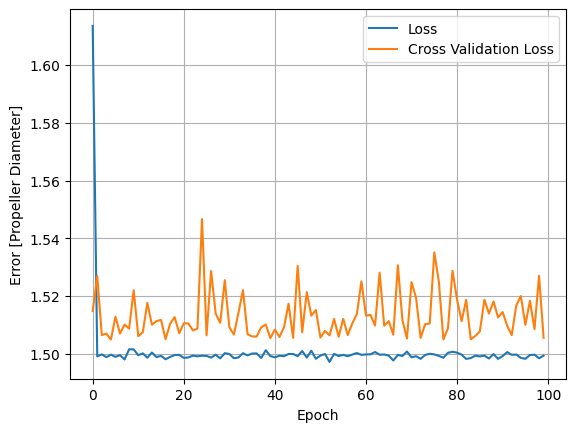

In [ ]:
# Identify Strings for graphing
errorStr14 = 'Propeller Diameter'

# Plot Loss Function for model
plotLoss(history14,errorStr14)

110/110 [==============================] - 0s 2ms/step


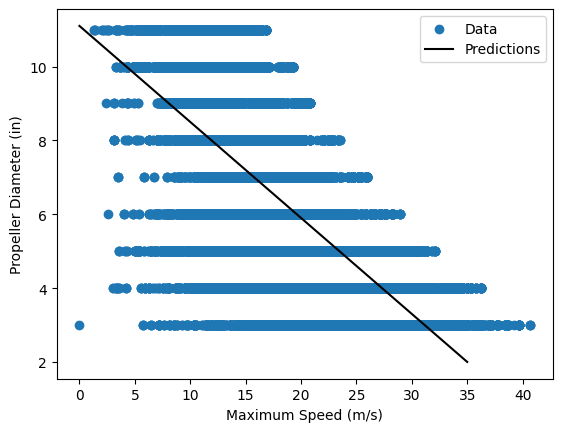

In [ ]:
# Identify Prediction Values and Output Values
x14 = tf.linspace(0, 35, 3501)
y14 = MaxSpeedPropDiamModel.predict(x14)

# Generate plot strings for regression
trainF14 = trainFeaturesPropDiam['MaxSpeed']
trainL14 = trainPropDiam

inputVarStr14 = 'Maximum Speed (m/s)'
outputVarStr14 = 'Propeller Diameter (in)'

# Plot values
plotRegression(x14,y14,trainF14,trainL14,inputVarStr14,outputVarStr14)

# Save test results
testResults['MaxSpeedPropDiamModel'] = MaxSpeedPropDiamModel.evaluate(
    testFeaturesPropDiam['MaxSpeed'],testPropDiam,
    verbose=0)

In [ ]:
# Print Test Results
pd.DataFrame(testResults, index=['Mean Absolute Error']).T

,Mean Absolute Error
MTOWKVModel,483.724762
MTOWmotDiamModel,2.893150
MTOWPropDiamModel,1.342348
MTOWESCCurrentModel,6.193513
MTOWBattCapModel,575.861816
EnduranceKVModel,562.378662
dnnEnduranceBattCapModel,632.405823
RangeBattCapModel,771.549561
MaxSpeedKVModel,582.399109
MaxSpeedPropPitchModel,1.104267
